In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from census import Census

Zip_Code_Data = "finalfinaldata.csv"

file = "race.csv"
Race_df = pd.read_csv(file)
# Read the City and Ride Data
Zip_df = pd.read_csv(Zip_Code_Data)

# Census API Key
c = Census("85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98", year=2013)

Zip_df.groupby('zipcode').count()





,Unnamed: 0,Index,Date/Time,Date,Time,Status,Address,crime num,Crime Type,Committed/Attempted,Area Type,Sub Crime,Coordinates,Map,Lattitude,Longitude
zipcode,,,,,,,,,,,,,,,,
0,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
32789,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
32801,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
32803,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
32804,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
32805,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
32806,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
32807,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
32808,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


In [3]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:32789, 32801, 32803, 32804, 32805, 32806, 32807, 32808, 32809, 32810, 32811, 32812, 32814, 32819, 32822, 32824, 32827, 32829, 32832, 32835, 32839'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Rate"]]
census_pd['Zipcode']=census_pd['Zipcode'].apply(int)
# Visualize
#print(len(census_pd))
census_pd.head(5)



,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate
0,32789,24635.0,41.3,63398.0,51443.0,10.444490
1,32801,11237.0,37.4,47151.0,40726.0,18.430186
2,32803,17680.0,39.4,53101.0,40884.0,11.029412
3,32804,16826.0,40.4,58548.0,42558.0,11.357423
4,32805,22001.0,36.2,23950.0,14649.0,35.257488


In [4]:
Race_df.head(5)
merged_table = pd.merge(census_pd, Race_df, on="Zipcode")
print(merged_table)

    Zipcode  Population  Median Age  Household Income  Per Capita Income  \
0     32789     24635.0        41.3           63398.0            51443.0   
1     32801     11237.0        37.4           47151.0            40726.0   
2     32803     17680.0        39.4           53101.0            40884.0   
3     32804     16826.0        40.4           58548.0            42558.0   
4     32805     22001.0        36.2           23950.0            14649.0   
5     32806     25598.0        38.9           51996.0            32396.0   
6     32807     32604.0        33.6           35980.0            17077.0   
7     32808     50146.0        31.3           33511.0            14303.0   
8     32809     25126.0        35.8           31966.0            18829.0   
9     32810     33503.0        33.9           42580.0            21716.0   
10    32811     38301.0        29.8           34189.0            15654.0   
11    32812     36753.0        35.6           45934.0            25011.0   
12    32814 

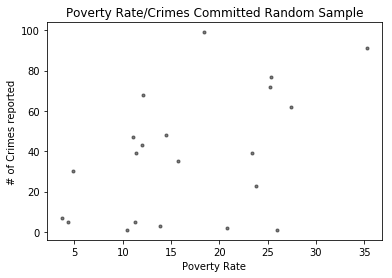

In [44]:
# Create data
x =  merged_table['Poverty Rate']
y = merged_table['Crime Sample']
colors = (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Poverty Rate/Crimes Committed Random Sample')
plt.xlabel('Poverty Rate')
plt.ylabel('# of Crimes reported')
plt.show()